# Lecture 1: The Quantum Bit (Qubit) and Single Qubit Gates

Welcome to your first step into the fascinating world of quantum computing! In this lecture, we'll explore:
1.  What a qubit is and how it differs from a classical bit.
2.  The concept of superposition and the Bloch sphere.
3.  How to represent qubit states mathematically.
4.  Fundamental single-qubit operations (gates): X, Y, Z, H, S, T.
5.  Measuring a qubit.
6.  Building and simulating your first quantum circuits with Qiskit.

**Prerequisites:**
*   Basic Python knowledge (variables, functions, lists).
*   Familiarity with Jupyter Notebooks.
*   High-school level linear algebra (vectors, matrices) will be helpful for the "Math Section" but not strictly required to follow the coding.

In [24]:
# Import necessary Qiskit components
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_city
from qiskit_aer import AerSimulator

# Standard Python libraries
import numpy as np
import matplotlib.pyplot as plt

print("Qiskit components imported successfully!")
print(f"Qiskit version: {qiskit.__version__}")

Qiskit components imported successfully!
Qiskit version: 2.0.1


**Analysis:**
We're importing the core `QuantumCircuit` class to build our circuits.
`transpile` is used to prepare circuits for execution, especially for specific backends.
`Statevector` allows us to inspect the exact quantum state of a simulated circuit.
`AerSimulator` is the modern way to access Qiskit's high-performance quantum simulators.
`qiskit_ibm_provider` will be used if we connect to real IBM Quantum hardware.
Visualization tools like `plot_histogram` (for measurement outcomes) and `plot_bloch_multivector` (for qubit states) are crucial.
`numpy` is essential for numerical operations, especially with state vectors and matrices.

## 1. The Classical Bit vs. The Quantum Bit (Qubit)

A **classical bit** is the fundamental unit of information in classical computing. It can exist in one of two states:
*   **0**
*   **1**

A **Quantum Bit** or **Qubit** is the fundamental unit of information in quantum computing. Like a classical bit, it can be **0** or **1**. However, a qubit can also be in a **superposition** of both 0 and 1 simultaneously.

**Physical Intuition:**
Imagine a classical bit as a light switch: it's either ON (1) or OFF (0).
A qubit is more like a dimmer switch that can be at any point between fully OFF and fully ON, or even in a combination of states. More accurately, think of an electron's spin, which can be "spin up" (conventionally |0⟩), "spin down" (conventionally |1⟩), or a combination of both until measured. Other physical implementations include photon polarization, energy levels of an atom, etc.

**Math Section: Representing Qubit States**
We represent the states of a qubit using 2D column vectors called "kets" (from Dirac notation, `|ψ⟩`).
*   The state **|0⟩** is represented as:
    $$ |0⟩ = \begin{pmatrix} 1 \\ 0 \end{pmatrix} $$
*   The state **|1⟩** is represented as:
    $$ |1⟩ = \begin{pmatrix} 0 \\ 1 \end{pmatrix} $$

A general qubit state, |ψ⟩ (psi), can be a linear combination (superposition) of |0⟩ and |1⟩:
$$ |ψ⟩ = \alpha |0⟩ + \beta |1⟩ = \alpha \begin{pmatrix} 1 \\ 0 \end{pmatrix} + \beta \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} \alpha \\ \beta \end{pmatrix} $$
Here, α (alpha) and β (beta) are complex numbers called **amplitudes**.
The squares of the magnitudes of these amplitudes give the probabilities of measuring the qubit in the corresponding state:
*   Probability of measuring |0⟩ = |α|²
*   Probability of measuring |1⟩ = |β|²
And these probabilities must sum to 1:  **|α|² + |β|² = 1**.

**Physical Intuition:**
*   **Classical Bit:** Think of a light switch. It's either OFF (0) or ON (1). There's no in-between.
*   **Qubit:** Imagine a dimmer switch, but it's more subtle. It's not just about intensity. A better analogy (though still imperfect) is an electron's intrinsic angular momentum, called spin. It can be "spin up" (conventionally |0⟩), "spin down" (conventionally |1⟩), or a specific combination of both simultaneously. When you measure the spin along a particular axis (e.g., the Z-axis), it will definitively be found either up or down. Other physical systems used as qubits include the polarization of a photon, energy levels in an atom, or tiny superconducting circuits.
The key is that before measurement, α and β describe the *potential* for the qubit to be 0 or 1.

## 2. The Bloch Sphere: Visualizing a Qubit

The state of a single qubit can be visualized as a point on the surface of a 3D sphere called the **Bloch Sphere**.

*   The **North Pole** typically represents the state |0⟩.
*   The **South Pole** typically represents the state |1⟩.

Any point on the surface represents a valid qubit state.
For $|ψ⟩ = \alpha |0⟩ + \beta |1⟩$, we can also write it using angles θ (theta) and φ (phi):
$$ |ψ⟩ = \cos(\theta/2) |0⟩ + e^{i\phi} \sin(\theta/2) |1⟩ $$
where:
*   `0 ≤ θ ≤ π` (polar angle from the +Z axis)
*   `0 ≤ φ < 2π` (azimuthal angle from the +X axis in the XY-plane)

**Note:** Only pure states lie on the surface. Mixed states (which we won't cover in detail yet) lie inside the sphere. Global phase (an overall complex factor multiplying the entire state vector, e.g., $e^{i\gamma}(\alpha|0⟩ + \beta|1⟩)$) is not physically distinguishable and does not change the point on the Bloch sphere.

Let's visualize |0⟩ and |1⟩.

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


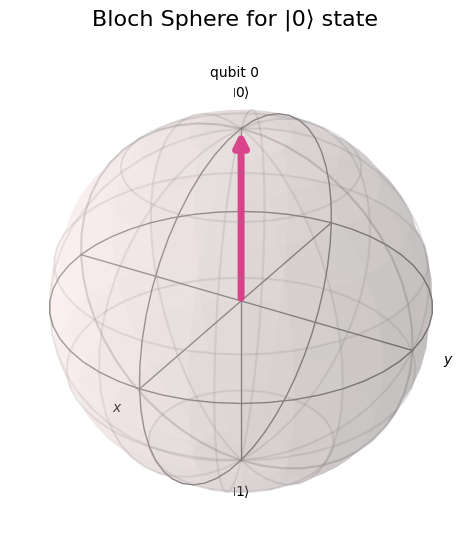

In [25]:
# Visualize |0>
zero_state = Statevector.from_label('0')
print(zero_state)
plot_bloch_multivector(zero_state, title="Bloch Sphere for |0⟩ state")

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


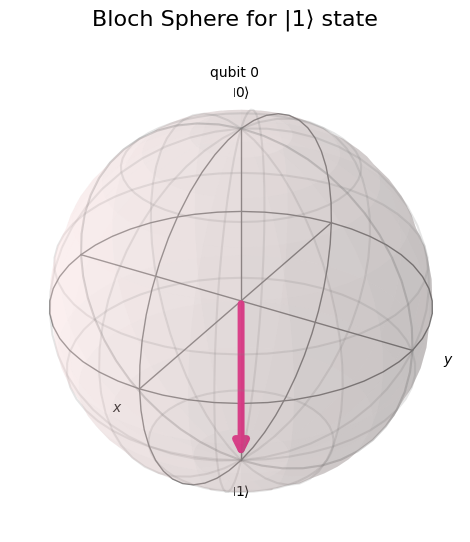

In [26]:
# Visualize |1>
one_state = Statevector.from_label('1')
print(one_state)
plot_bloch_multivector(one_state, title="Bloch Sphere for |1⟩ state")

**Analysis:**
As expected, the |0⟩ state vector `[1.+0.j 0.+0.j]` points to the North Pole of the Bloch sphere.
The |1⟩ state vector `[0.+0.j 1.+0.j]` points to the South Pole.
The `Statevector` class is a handy tool in `qiskit.quantum_info` for representing and manipulating quantum states directly (useful in simulation).
`plot_bloch_multivector` (even for a single qubit) is the standard Qiskit function.

## 3. Single Qubit Gates: Operations on Qubits

Quantum gates are operations that evolve the state of qubits. They are analogous to logic gates (like NOT, AND, OR) in classical computing but are reversible (except for measurement). Single qubit gates are represented by 2x2 **unitary matrices**.

**Math Section: Unitary Matrices**
A matrix U is unitary if its conjugate transpose U† (U-dagger) is also its inverse. That is, U†U = UU† = I, where I is the identity matrix.
$$ U = \begin{pmatrix} a & b \\ c & d \end{pmatrix} \implies U^\dagger = \begin{pmatrix} a^* & c^* \\ b^* & d^* \end{pmatrix} $$
Unitary operations preserve the normalization condition (|α|² + |β|² = 1), meaning they preserve the length of the state vector.
On the Bloch sphere, single qubit gates correspond to **rotations** of the state vector.

**Physical Intuition:**
Applying a gate to a qubit is like applying a carefully controlled physical pulse (e.g., a microwave pulse or a laser pulse of a specific duration, frequency, and phase) to the physical system representing the qubit. This pulse causes the qubit's state (its α and β, or its θ and φ) to change in a precise, deterministic way.

### 3.1 The X-Gate (Pauli-X or NOT Gate)

The X-gate flips the state of a qubit between |0⟩ and |1⟩.
*   X|0⟩ = |1⟩
*   X|1⟩ = |0⟩

**Math Section: X-Gate Matrix**
$$ X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} $$
Applying it to |0⟩:
$$ X|0⟩ = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} (0 \cdot 1) + (1 \cdot 0) \\ (1 \cdot 1) + (0 \cdot 0) \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} = |1⟩ $$
Applying it to |1⟩:
$$ X|1⟩ = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} (0 \cdot 0) + (1 \cdot 1) \\ (1 \cdot 0) + (0 \cdot 1) \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} = |0⟩ $$

**Physical Intuition (Bloch Sphere):**
The X-gate performs a rotation of π radians (180 degrees) around the X-axis of the Bloch sphere.

Circuit diagram for X-gate:
   ┌───┐
q: ┤ X ├
   └───┘

Statevector after X-gate on |0>: [0.+0.j 1.+0.j]


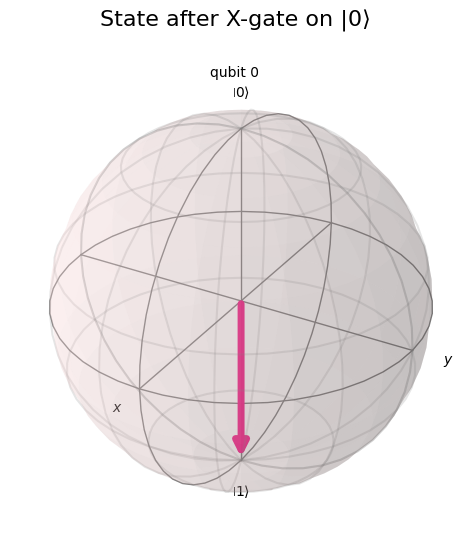

In [27]:
# Create a quantum circuit with 1 qubit
qc_x = QuantumCircuit(1)

# Apply X-gate to qubit 0 (initially in |0> state)
qc_x.x(0)

# Let's see the circuit
print("Circuit diagram for X-gate:")
print(qc_x.draw(output='text'))

# Visualize the state on the Bloch sphere
# First, get the statevector
sv_x = Statevector(qc_x)
print(f"\nStatevector after X-gate on |0>: {sv_x.data}")
plot_bloch_multivector(sv_x, title="State after X-gate on |0⟩")

In [28]:
# Create a quantum circuit with 1 qubit
qc_x = QuantumCircuit(1) # Qubit is initialized to |0>

# Apply X-gate to qubit 0
qc_x.x(0)

# Let's see the circuit (text-based)
print("Circuit diagram for X-gate:")
print(qc_x.draw(output='text'))

# Visualize the state on the Bloch sphere
sv_x = Statevector(qc_x)
print(f"\nStatevector after X-gate on |0⟩: {sv_x.data}")
plot_bloch_multivector(sv_x, title="State after X-gate on |0⟩")
plt.show()

# What happens if we apply X again?
qc_x.x(0) # Apply X-gate a second time
sv_xx = Statevector(qc_x)
print(f"\nStatevector after X-X on |0⟩: {sv_xx.data}")
plot_bloch_multivector(sv_xx, title="State after X-gate applied twice on |0⟩")
plt.show()
print("Circuit diagram for X-X:")
print(qc_x.draw(output='text'))

Circuit diagram for X-gate:
   ┌───┐
q: ┤ X ├
   └───┘

Statevector after X-gate on |0⟩: [0.+0.j 1.+0.j]

Statevector after X-X on |0⟩: [1.+0.j 0.+0.j]
Circuit diagram for X-X:
   ┌───┐┌───┐
q: ┤ X ├┤ X ├
   └───┘└───┘


**Analysis:**
We created a `QuantumCircuit` with one qubit. By default, qubits initialize to the |0⟩ state. Applying `qc.x(0)` performs the X operation on this qubit. The `Statevector` shows `[0.+0.j, 1.+0.j]`, which is our |1⟩ state. The Bloch sphere confirms the qubit is now at the South Pole.

**Analysis:**
We created a `QuantumCircuit` with one qubit (q0). Qubits in Qiskit initialize to |0⟩.
Applying `qc_x.x(0)` operates the X-gate on q0.
The `Statevector` `[0.+0.j 1.+0.j]` confirms the state is now |1⟩. The Bloch sphere shows the vector pointing to the South Pole.
Applying the X-gate twice (X·X) returns the qubit to its original state |0⟩. This is because X is its own inverse (X·X = I, the Identity operation), corresponding to two 180-degree rotations around the X-axis.

### 3.2 The Y-Gate (Pauli-Y)

The Y-gate also flips |0⟩ to |1⟩ and |1⟩ to |0⟩ but with different phases.
*   Y|0⟩ =  i|1⟩
*   Y|1⟩ = -i|0⟩

**Math Section: Y-Gate Matrix**
$$ Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} $$
**Physical Intuition (Bloch Sphere):** Rotation by π radians (180 degrees) around the Y-axis.

### 3.3 The Z-Gate (Pauli-Z or Phase Flip Gate)

The Z-gate leaves |0⟩ unchanged but flips the phase of |1⟩.
*   Z|0⟩ = |0⟩
*   Z|1⟩ = -|1⟩ (Note: -|1⟩ has the same measurement probabilities as |1⟩, but the phase is important in superpositions)

**Math Section: Z-Gate Matrix**
$$ Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} $$
**Physical Intuition (Bloch Sphere):** Rotation by π radians (180 degrees) around the Z-axis.

In [29]:
# Y-gate example
qc_y = QuantumCircuit(1)
qc_y.y(0)
sv_y = Statevector(qc_y)
print(f"Statevector after Y-gate on |0⟩: {np.round(sv_y.data, 3)}") # Expect [0, i]
plot_bloch_multivector(sv_y, title="State after Y-gate on |0⟩")
plt.show()

# Z-gate example on |0>
qc_z0 = QuantumCircuit(1)
qc_z0.z(0)
sv_z0 = Statevector(qc_z0)
print(f"\nStatevector after Z-gate on |0⟩: {np.round(sv_z0.data, 3)}") # Expect [1, 0]
plot_bloch_multivector(sv_z0, title="State after Z-gate on |0⟩")
plt.show()

# Z-gate example on |1> (first apply X, then Z)
qc_z1 = QuantumCircuit(1)
qc_z1.x(0) # Qubit is now |1>
qc_z1.z(0) # Apply Z-gate
sv_z1 = Statevector(qc_z1)
print(f"\nStatevector after Z-gate on |1⟩: {np.round(sv_z1.data, 3)}") # Expect [0, -1]
plot_bloch_multivector(sv_z1, title="State after Z-gate on |1⟩")
plt.show()

Statevector after Y-gate on |0⟩: [0.+0.j 0.+1.j]

Statevector after Z-gate on |0⟩: [1.+0.j 0.+0.j]

Statevector after Z-gate on |1⟩: [ 0.+0.j -1.+0.j]


Statevector after Z-gate on |0>: [1.+0.j 0.+0.j]

Statevector after Z-gate on |1>: [ 0.+0.j -1.+0.j]


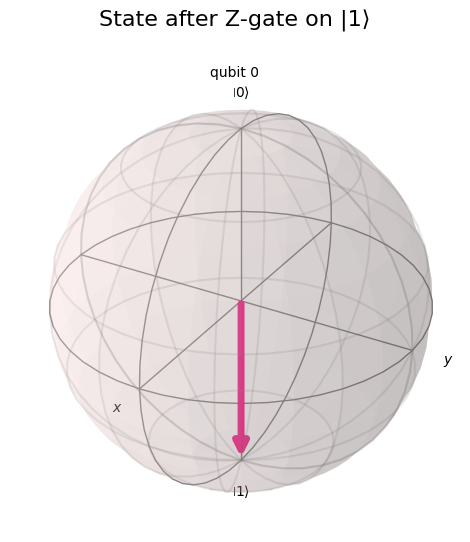

In [30]:
# Create a circuit and apply Z-gate to |0>
qc_z0 = QuantumCircuit(1)
qc_z0.z(0)
sv_z0 = Statevector(qc_z0)
print(f"Statevector after Z-gate on |0>: {sv_z0.data}")
plot_bloch_multivector(sv_z0, title="State after Z-gate on |0⟩")

# Create a circuit, put qubit in |1> state, then apply Z-gate
qc_z1 = QuantumCircuit(1)
qc_z1.x(0) # Qubit is now |1>
qc_z1.z(0) # Apply Z-gate
sv_z1 = Statevector(qc_z1)
print(f"\nStatevector after Z-gate on |1>: {sv_z1.data}")
plot_bloch_multivector(sv_z1, title="State after Z-gate on |1⟩")

**Analysis:**
For |0⟩, applying Z results in `[1, 0]`, which is still |0⟩.
For |1⟩ (obtained by first applying X to |0⟩), applying Z results in `[0, -1]`, which is -|1⟩.
Visually on the Bloch sphere, these states look identical to |0⟩ and |1⟩ respectively, because the Bloch sphere visualization doesn't show *global phase*. The minus sign in -|1⟩ is a global phase if the qubit *was already* |1⟩. However, if the qubit was in a superposition, like `(|0> + |1>)/sqrt(2)`, then Z would change it to `(|0> - |1>)/sqrt(2)`, which *is* a different point on the Bloch sphere. We'll see this with the Hadamard gate.

**Analysis:**
*   **Y-gate on |0⟩:** Results in `[0.+0.j, 0.+1.j]`, which is `i|1⟩`. On the Bloch sphere, |0⟩ (North Pole) rotates 180 degrees around the Y-axis. The resulting vector points towards the South Pole. The phase `i` is a global phase here if the qubit *was* |1>, but it's a relative phase if it becomes part of a superposition.
*   **Z-gate on |0⟩:** Results in `[1.+0.j, 0.+0.j]`, still |0⟩. A 180-degree rotation around Z keeps the North Pole vector where it is.
*   **Z-gate on |1⟩:** First, X takes |0⟩ to |1⟩. Then Z acts on |1⟩, resulting in `[0.+0.j, -1.+0.j]`, which is `-|1⟩`. The South Pole vector rotated 180 degrees around Z stays at the South Pole. The negative sign indicates a phase flip. While this phase isn't observable if you immediately measure in the Z-basis (computational basis), it becomes crucial when combined with other gates like Hadamard.

Cell 8: The Y-Gate (Pauli-Y)
### 3.3 The Y-Gate (Pauli-Y Gate)

The Y-gate can be thought of as a combination of X and Z operations (Y = iXZ, up to a global phase).
*   Y|0⟩ =  i|1⟩
*   Y|1⟩ = -i|0⟩

**Math Section:**
The Y-gate is represented by the Pauli-Y matrix:
$$ Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} $$
Applying it to |0⟩:
$$ Y|0⟩ = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ i \end{pmatrix} = i|1⟩ $$
Applying it to |1⟩:
$$ Y|1⟩ = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} -i \\ 0 \end{pmatrix} = -i|0⟩ $$

**Physical Intuition (Bloch Sphere):**
The Y-gate performs a rotation of π (180 degrees) around the Y-axis of the Bloch sphere.

Statevector after Y-gate on |0>: [0.+0.j 0.+1.j]


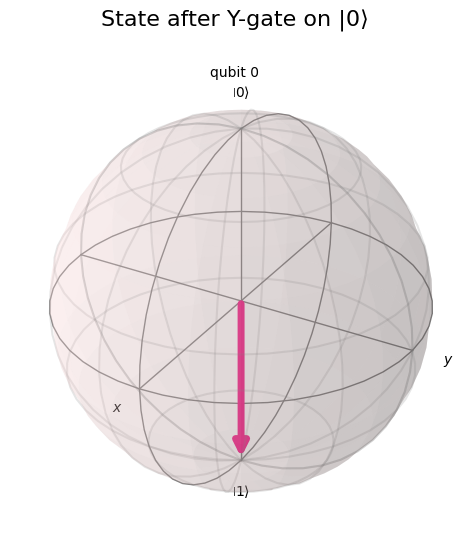

In [31]:
# Create a circuit and apply Y-gate to |0>
qc_y = QuantumCircuit(1)
qc_y.y(0)
sv_y = Statevector(qc_y)
print(f"Statevector after Y-gate on |0>: {sv_y.data}") # Expect [0, i]
plot_bloch_multivector(sv_y, title="State after Y-gate on |0⟩")

**Analysis:**
The statevector for Y|0⟩ is `[0.+0.j, 0.+1.j]`, which is `i|1⟩`. On the Bloch sphere, |0⟩ (North Pole) rotates 180 degrees around the Y-axis to become |1⟩ (South Pole), but with a phase `i`. The Bloch sphere visualization shows the vector pointing to the south pole, as global phase isn't shown. If we started in `|+⟩` (on X-axis), a Y rotation would move it to `|-⟩` (on -X-axis) but also add a phase.

### 3.4 The Hadamard Gate (H-Gate)

The Hadamard gate is one of the most important gates in quantum computing. It creates an equal superposition of |0⟩ and |1⟩ from a basis state.
*   H|0⟩ = (|0⟩ + |1⟩) / √2  (This state is often called the **|+⟩** state)
*   H|1⟩ = (|0⟩ - |1⟩) / √2  (This state is often called the **|–⟩** state)

If you apply H to |+⟩, you get |0⟩. If you apply H to |–⟩, you get |1⟩. So, H acts as a basis change. Applying H twice returns the qubit to its original state (HH = I).

**Math Section: H-Gate Matrix**
$$ H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} $$
Applying H to |0⟩:
$$ H|0⟩ = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}}|0⟩ + \frac{1}{\sqrt{2}}|1⟩ $$
The amplitudes are α = 1/√2 and β = 1/√2.
So, |α|² = 1/2 and |β|² = 1/2. This means if you measure this state, you have a 50% chance of getting 0 and a 50% chance of getting 1.

**Physical Intuition (Bloch Sphere):**
The H-gate can be thought of as a rotation by π radians (180 degrees) around an axis that is tilted halfway between the X and Z axes.
*   H|0⟩ (North Pole vector) rotates to the +X axis of the Bloch sphere. This is the |+⟩ state.
*   H|1⟩ (South Pole vector) rotates to the -X axis of the Bloch sphere. This is the |–⟩ state.

Statevector after H-gate on |0> (|+> state): [0.70710678+0.j 0.70710678+0.j]

Statevector after H-gate on |1> (|-> state): [ 0.70710678+0.j -0.70710678+0.j]


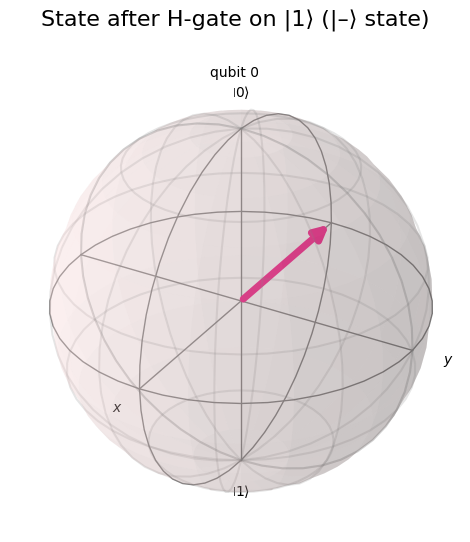

In [32]:
# H-gate on |0>
qc_h0 = QuantumCircuit(1)
qc_h0.h(0)
sv_h0 = Statevector(qc_h0)
print(f"Statevector after H-gate on |0> (|+> state): {sv_h0.data}") # Expect [1/sqrt(2), 1/sqrt(2)]
plot_bloch_multivector(sv_h0, title="State after H-gate on |0⟩ (|+⟩ state)")

# H-gate on |1>
qc_h1 = QuantumCircuit(1)
qc_h1.x(0) # Qubit is now |1>
qc_h1.h(0) # Apply H-gate
sv_h1 = Statevector(qc_h1)
print(f"\nStatevector after H-gate on |1> (|-> state): {sv_h1.data}") # Expect [1/sqrt(2), -1/sqrt(2)]
plot_bloch_multivector(sv_h1, title="State after H-gate on |1⟩ (|–⟩ state)")

In [33]:
# H-gate on |0>
qc_h0 = QuantumCircuit(1)
qc_h0.h(0)
sv_h0 = Statevector(qc_h0)
print(f"Statevector after H-gate on |0⟩ (|+⟩ state): {np.round(sv_h0.data, 3)}")
# Expect [1/sqrt(2), 1/sqrt(2)] which is approx [0.707, 0.707]
plot_bloch_multivector(sv_h0, title="State after H-gate on |0⟩ (|+⟩ state)")
plt.show()

# H-gate on |1>
qc_h1 = QuantumCircuit(1)
qc_h1.x(0) # Qubit is now |1>
qc_h1.h(0) # Apply H-gate
sv_h1 = Statevector(qc_h1)
print(f"\nStatevector after H-gate on |1⟩ (|–⟩ state): {np.round(sv_h1.data, 3)}")
# Expect [1/sqrt(2), -1/sqrt(2)] which is approx [0.707, -0.707]
plot_bloch_multivector(sv_h1, title="State after H-gate on |1⟩ (|–⟩ state)")
plt.show()

# Apply H twice
qc_hh = QuantumCircuit(1)
qc_hh.h(0)
qc_hh.h(0)
sv_hh = Statevector(qc_hh)
print(f"\nStatevector after H-H on |0⟩: {np.round(sv_hh.data, 3)}")
plot_bloch_multivector(sv_hh, title="State after H-H on |0⟩")
plt.show()

Statevector after H-gate on |0⟩ (|+⟩ state): [0.707+0.j 0.707+0.j]

Statevector after H-gate on |1⟩ (|–⟩ state): [ 0.707+0.j -0.707+0.j]

Statevector after H-H on |0⟩: [1.+0.j 0.+0.j]


**Analysis:**
*   For H|0⟩, the statevector is `[0.707+0.j, 0.707+0.j]`, which is `(1/√2)|0⟩ + (1/√2)|1⟩`. This is the |+⟩ state, pointing along the +X axis on the Bloch sphere.
*   For H|1⟩, the statevector is `[0.707+0.j, -0.707+0.j]`, which is `(1/√2)|0⟩ - (1/√2)|1⟩`. This is the |–⟩ state, pointing along the -X axis on the Bloch sphere. The negative sign for the |1⟩ amplitude is crucial here – it's a *relative phase* that distinguishes |+⟩ from |–⟩.
*   Applying H twice returns the qubit to |0⟩, demonstrating H·H = I.
The Hadamard gate is fundamental for creating the superpositions that quantum algorithms leverage for parallelism and interference.

### 3.5 Phase Gates: S, S† (Sdg), T, T† (Tdg)

These gates apply a phase shift only to the |1⟩ component of a qubit's state. They leave the |0⟩ component unchanged. They represent rotations around the Z-axis of the Bloch sphere.

**S-Gate (Phase gate, or √Z gate conceptually):**
Rotates around the Z-axis by π/2 radians (90 degrees).
*   S|0⟩ = |0⟩
*   S|1⟩ = i|1⟩
$$ S = \begin{pmatrix} 1 & 0 \\ 0 & i \end{pmatrix} $$
Its inverse is the **S†-gate** (S-dagger or Sdg-gate in Qiskit `qc.sdg(qubit)`), which rotates by -π/2.
$$ S^\dagger = \begin{pmatrix} 1 & 0 \\ 0 & -i \end{pmatrix} $$

**T-Gate (π/8 gate):**
Rotates around the Z-axis by π/4 radians (45 degrees).
*   T|0⟩ = |0⟩
*   T|1⟩ = e^(iπ/4)|1⟩
$$ T = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ 0 & \frac{1+i}{\sqrt{2}} \end{pmatrix} $$
Its inverse is the **T†-gate** (T-dagger or Tdg-gate in Qiskit `qc.tdg(qubit)`), rotating by -π/4.
$$ T^\dagger = \begin{pmatrix} 1 & 0 \\ 0 & e^{-i\pi/4} \end{pmatrix} $$
The T-gate is particularly important because {H, T} gates form a universal set for single-qubit operations (any single-qubit unitary operation can be approximated arbitrarily well by a sequence of H and T gates).

Statevector after S-gate on |+>: [0.70710678+0.j         0.        +0.70710678j]

Statevector after T-gate on |+>: [0.70710678+0.j  0.5       +0.5j]


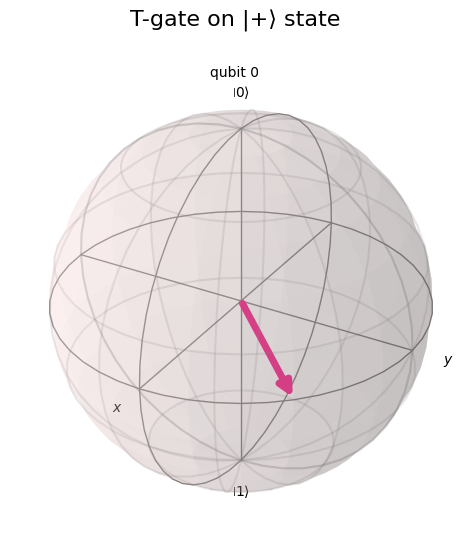

In [34]:
# S-gate example: Apply S to |+> state
qc_s = QuantumCircuit(1)
qc_s.h(0) # Qubit is now |+> = (1/sqrt(2))(|0> + |1>)
qc_s.s(0) # Apply S-gate
sv_s = Statevector(qc_s)
print(f"Statevector after S-gate on |+>: {sv_s.data}")
# Expected: (1/sqrt(2))(|0> + i|1>), which is |+i_Y> state, points along +Y axis
plot_bloch_multivector(sv_s, title="S-gate on |+⟩ state")

# T-gate example: Apply T to |+> state
qc_t = QuantumCircuit(1)
qc_t.h(0) # Qubit is now |+>
qc_t.t(0) # Apply T-gate
sv_t = Statevector(qc_t)
print(f"\nStatevector after T-gate on |+>: {sv_t.data}")
# Expected: (1/sqrt(2))(|0> + e^(i*pi/4)|1>)
plot_bloch_multivector(sv_t, title="T-gate on |+⟩ state")

In [35]:
# S-gate example: Apply S to |+> state
qc_s = QuantumCircuit(1)
qc_s.h(0) # Qubit is now |+> = (1/sqrt(2))(|0> + |1>)
print(f"Statevector before S-gate (|+⟩ state): {np.round(Statevector(qc_s).data, 3)}")
qc_s.s(0) # Apply S-gate
sv_s = Statevector(qc_s)
print(f"Statevector after S-gate on |+⟩: {np.round(sv_s.data, 3)}")
# Expected: (1/sqrt(2))(|0> + i|1>), which is the |+i_Y> state, pointing along +Y axis
plot_bloch_multivector(sv_s, title="S-gate on |+⟩ state")
plt.show()

# T-gate example: Apply T to |+> state
qc_t = QuantumCircuit(1)
qc_t.h(0) # Qubit is now |+>
print(f"\nStatevector before T-gate (|+⟩ state): {np.round(Statevector(qc_t).data, 3)}")
qc_t.t(0) # Apply T-gate
sv_t = Statevector(qc_t)
print(f"Statevector after T-gate on |+⟩: {np.round(sv_t.data, 3)}")
# Expected: (1/sqrt(2))(|0> + e^(i*pi/4)|1>)
plot_bloch_multivector(sv_t, title="T-gate on |+⟩ state")
plt.show()

Statevector before S-gate (|+⟩ state): [0.707+0.j 0.707+0.j]
Statevector after S-gate on |+⟩: [0.707+0.j    0.   +0.707j]

Statevector before T-gate (|+⟩ state): [0.707+0.j 0.707+0.j]
Statevector after T-gate on |+⟩: [0.707+0.j  0.5  +0.5j]


**Analysis:**
*   **S-gate on |+⟩:** The state |+⟩ is $(|0⟩ + |1⟩)/√2$. Applying S gives $(|0⟩ + i|1⟩)/√2$. On the Bloch sphere, the vector initially on the +X axis rotates by 90 degrees around the Z-axis to point along the +Y axis. The statevector reflects this change in the phase of the β amplitude.
*   **T-gate on |+⟩:** Similarly, applying T to |+⟩ gives $(|0⟩ + e^{i\pi/4}|1⟩)/√2$. This is a 45-degree rotation around the Z-axis from the +X axis.
These phase gates are critical for constructing more complex quantum states and interference patterns in algorithms.

## 4. Measurement: Observing the Qubit

Quantum mechanics is inherently probabilistic when it comes to measurement. When we measure a qubit in a superposition state $|ψ⟩ = \alpha |0⟩ + \beta |1⟩$ in the computational basis ({|0⟩, |1⟩}):
*   We will get the outcome **0** with probability **P(0) = |α|²**.
*   We will get the outcome **1** with probability **P(1) = |β|²**.

**Crucially, measurement "collapses" the superposition.** After measurement, the qubit is no longer in the state $|ψ⟩$. It is definitively in the classical state (0 or 1) that was measured. This process is irreversible.

**Physical Intuition:**
Think of it like tossing a special quantum coin. While it's spinning in the air, it's in a superposition of heads and tails. When it lands (measurement), it must show either heads (0) or tails (1). The act of "landing" forces it into a definite state. In a real quantum system, measurement involves interacting the qubit with a larger classical apparatus (e.g., by shining a specific microwave frequency that causes a detectable shift in a resonator only if the qubit is |1⟩). This interaction amplifies the quantum state to a classical signal, forcing the qubit to "choose" one of the basis states.

Let's measure a qubit in the |+⟩ state (created by H|0⟩).
Theoretically, since $|+⟩ = (1/√2)|0⟩ + (1/√2)|1⟩$, we have α = 1/√2 and β = 1/√2.
So, P(0) = |1/√2|² = 1/2, and P(1) = |1/√2|² = 1/2.
We expect to measure 0 roughly 50% of the time and 1 roughly 50% of the time if we repeat the experiment many times.

Circuit diagram with measurement:
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 

Counts after 1024 measurements: {'0': 513, '1': 511}


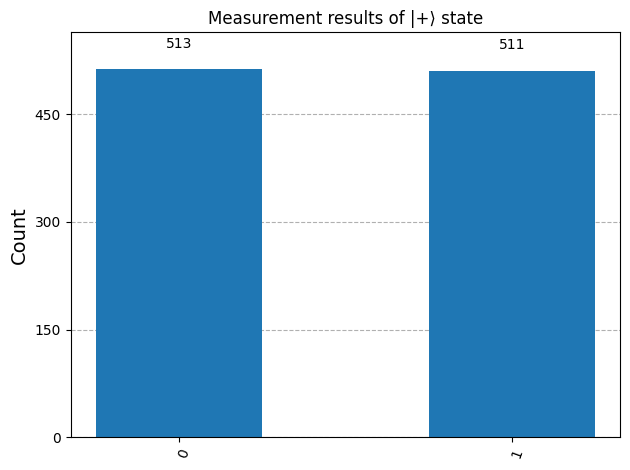

In [36]:
# Create a circuit with 1 qubit and 1 classical bit for measurement
qc_measure = QuantumCircuit(1, 1) # QuantumCircuit(num_qubits, num_classical_bits)

# Put qubit in |+> state
qc_measure.h(0)

# Measure qubit 0 and store the result in classical bit 0
qc_measure.measure(0, 0) # qc.measure(qubit_index, classical_bit_index)

print("Circuit diagram with measurement:")
print(qc_measure.draw(output='text'))

# Let's simulate this circuit multiple times using a simulator
# We'll use AerSimulator (modern Qiskit)
# For older Qiskit: simulator = Aer.get_backend('qasm_simulator')
simulator = AerSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc_measure, simulator)

# Run the simulation - 'shots' is the number of times we repeat the measurement
N_SHOTS = 1024
job = simulator.run(compiled_circuit, shots=N_SHOTS)
result = job.result()

# Get the counts of 0s and 1s
counts = result.get_counts(qc_measure)
print(f"\nCounts after {N_SHOTS} measurements: {counts}")

# Plot the histogram
plot_histogram(counts, title="Measurement results of |+⟩ state")

In [37]:
# Create a circuit with 1 quantum bit and 1 classical bit for measurement
# QuantumCircuit(num_qubits, num_classical_bits)
qc_measure = QuantumCircuit(1, 1)

# 1. Put qubit in |+> state
qc_measure.h(0)

# 2. Measure qubit 0 and store the result in classical bit 0
# qc.measure(qubit_index_or_list, classical_bit_index_or_list)
qc_measure.measure(0, 0)

print("Circuit diagram with measurement:")
print(qc_measure.draw(output='text'))

# Let's simulate this circuit multiple times using AerSimulator
simulator = AerSimulator()

# Transpile the circuit for the simulator (good practice, though often optional for basic Aer runs)
# This step becomes more important for real hardware or complex simulations.
compiled_circuit = transpile(qc_measure, simulator)

# Run the simulation. 'shots' is the number of times we repeat the entire
# process of preparing the |+> state and measuring it.
N_SHOTS = 2048 # Number of times to run the circuit
job = simulator.run(compiled_circuit, shots=N_SHOTS)

# Get the result from the job
result = job.result()

# Get the counts of 0s and 1s from the result
counts = result.get_counts(qc_measure) # or result.get_counts(compiled_circuit)
print(f"\nCounts after {N_SHOTS} measurements: {counts}")

# Plot the histogram of results
plot_histogram(counts, title="Measurement results of |+⟩ state")
plt.show()

Circuit diagram with measurement:
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 

Counts after 2048 measurements: {'1': 1024, '0': 1024}


**Analysis:**
We created a `QuantumCircuit` with one quantum bit (q0) and one classical bit (c0). The classical bit is necessary to store the outcome of the quantum measurement.
After applying the H-gate, q0 is in the |+⟩ state.
The `measure` instruction links the quantum bit to the classical bit.
The `AerSimulator` mimics the probabilistic nature of quantum measurement. When we run the circuit many times (shots), the `counts` dictionary shows how many times we measured '0' and how many times we measured '1'.
As expected from the theory (P(0)=0.5, P(1)=0.5), the histogram shows that the outcomes '0' and '1' occur with roughly equal frequency. Due to the statistical nature, the counts won't be exactly 50/50 for a finite number of shots, but they will tend towards it as `N_SHOTS` increases.
**Important Note:** After `qc_measure.measure(0,0)`, if we were to continue the circuit and apply more gates to qubit 0, those gates would act on either a |0⟩ state or a |1⟩ state (depending on the measurement outcome for that particular shot), not on the original |+⟩ superposition. Measurement is generally the last operation on a qubit in many algorithms.

## 5. Exercises

1.  **Create |–⟩ state and measure:**
    *   Start with a qubit in the |0⟩ state.
    *   Apply gates to transform it into the |–⟩ state: `(|0⟩ - |1⟩)/√2`.
    *   Measure the qubit 1000 times.
    *   Plot the histogram of results. What do you expect?

2.  **X-H sequence:**
    *   Apply an X-gate followed by an H-gate to a qubit initially in |0⟩.
    *   What is the final statevector? (Use `Statevector(circuit)`).
    *   Verify this mathematically. What state is this equivalent to?

3.  **Identity with Gates:**
    *   Show that applying the X-gate twice returns the qubit to its original state. (Hint: plot Bloch sphere before and after XX).
    *   Do the same for the H-gate (HH).

4.  **S† Gate:**
    *   If you apply an S-gate and then an S†-gate (SdgGate in Qiskit: `qc.sdg(0)`), what happens to the state `|+⟩`?
    *   Verify with Bloch sphere and statevector.


 **Z-gate on |+⟩ state:**
    *   Prepare a qubit in the |+⟩ state.
    *   Apply a Z-gate to it.
    *   What is the resulting statevector? (Use `Statevector(your_circuit)` to check).
    *   What state is this? (Hint: It's one of the states we've seen, possibly |–⟩).
    *   Verify this mathematically: Z H |0⟩.

3.  **From |+⟩ to |1⟩:**
    *   Start with a qubit in the |+⟩ state.
    *   Apply a sequence of one or more single-qubit gates (from X, Y, Z, H, S, T and their daggers) to transform it into the |1⟩ state.
    *   Display your circuit and verify the final state using `Statevector` and `plot_bloch_multivector`. (There are multiple solutions!)

4.  **S†S = Identity:**
    *   Apply an S-gate followed by an S†-gate (SdgGate in Qiskit: `qc.sdg(0)`) to a qubit initially in the |+⟩ state.
    *   What is the final state? Verify with `Statevector` and `plot_bloch_multivector`. Does this make sense?

## Lecture 1 Summary

In this lecture, we've:
*   Defined a qubit and its representation using statevectors and the Bloch sphere.
*   Explored key single-qubit gates: X, Y, Z, H, S, T, understanding their mathematical matrices and their rotational effect on the Bloch sphere.
*   Learned how to create superposition states using the Hadamard gate.
*   Understood the probabilistic nature of quantum measurement and how it collapses superposition.
*   Built, simulated, and visualized simple quantum circuits using Qiskit.

Next up: Multi-Qubit Gates and Entanglement!